In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
import itertools



In [ ]:
df = pd.read_csv('heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape

(920, 16)

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


plt.figure(figsize=(15, 8))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution of the data")
plt.show()

## UNIVARIATE ANALYSIS


In [ ]:
sns.set(style="whitegrid")

# Function to plot univariate distribution of numerical columns
def plot_univariate_numerical(df, column):
    plt.figure(figsize=(6, 2))
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Function to plot univariate distribution of categorical columns
def plot_univariate_categorical(df, column):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Separating numerical and categorical columns
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']


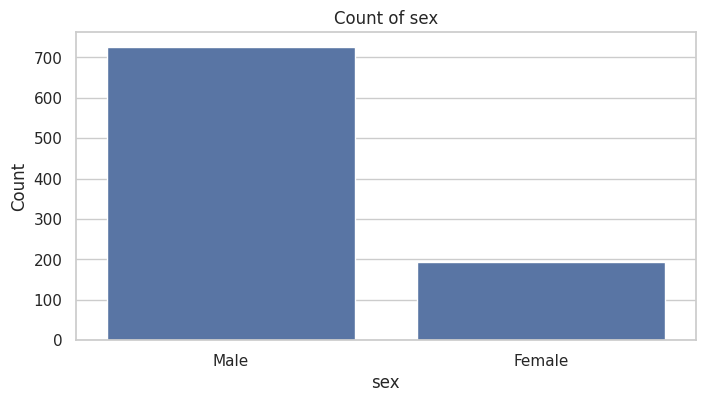

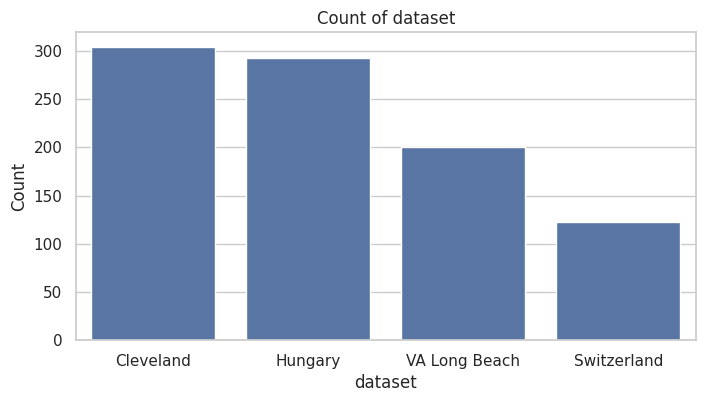

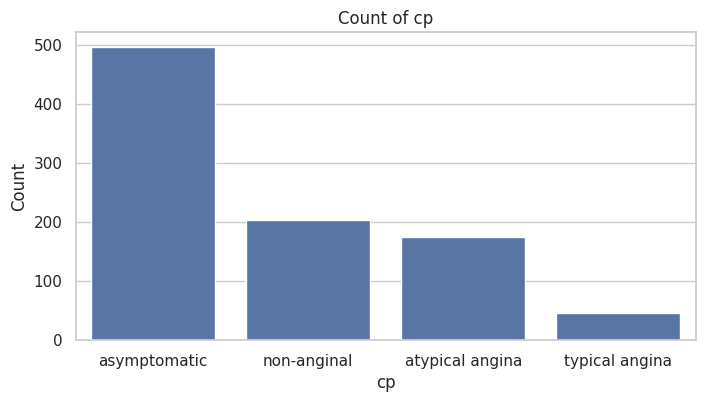

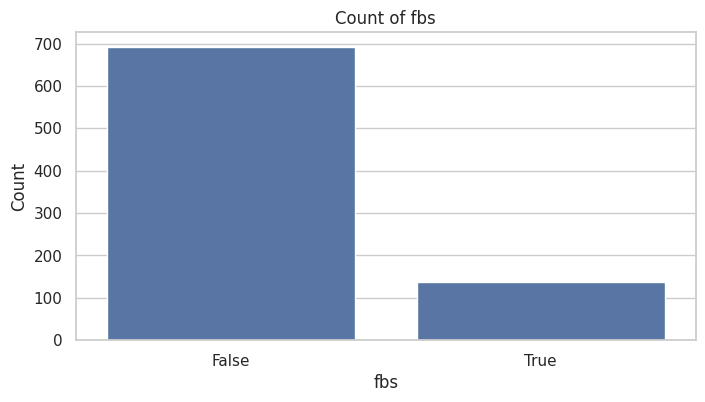

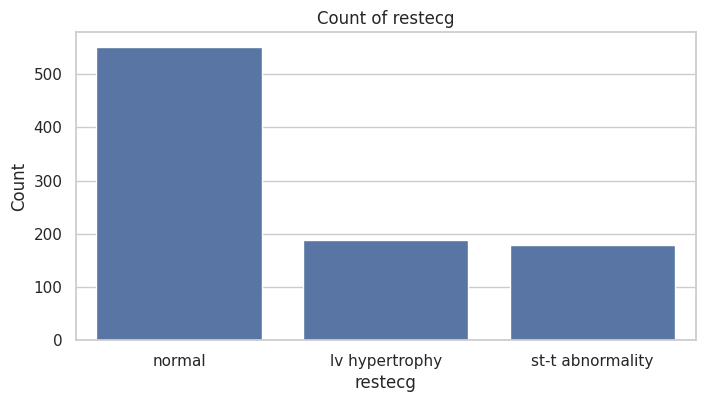

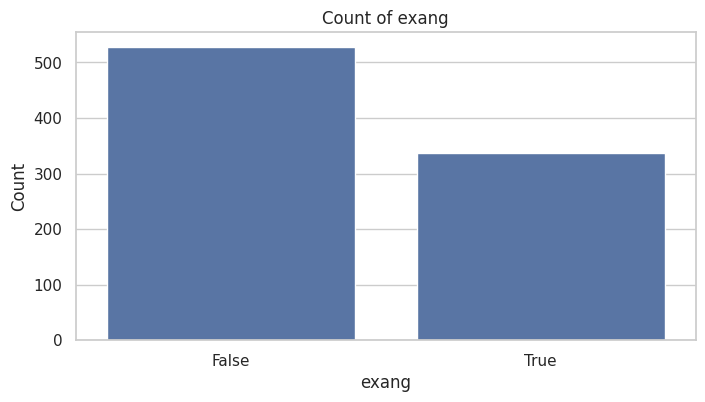

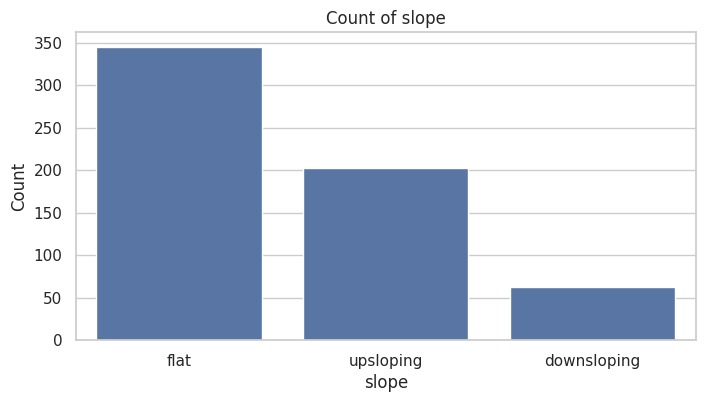

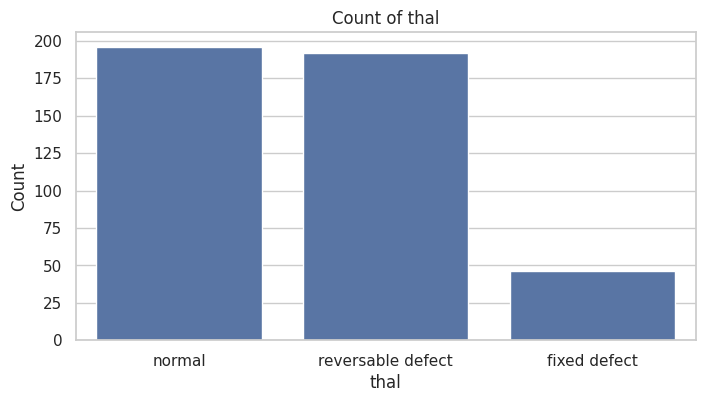

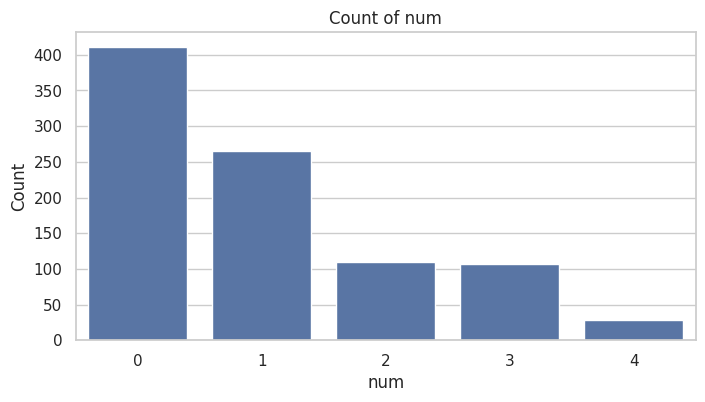

In [ ]:

# Plotting categorical columns
for col in categorical_columns:
    plot_univariate_categorical(df, col)

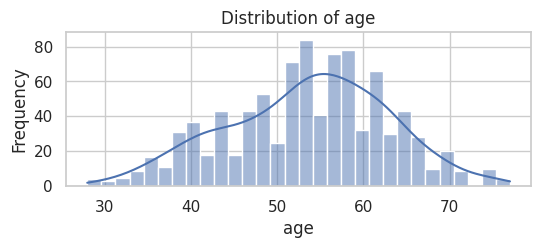

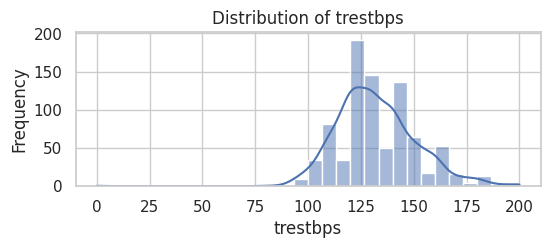

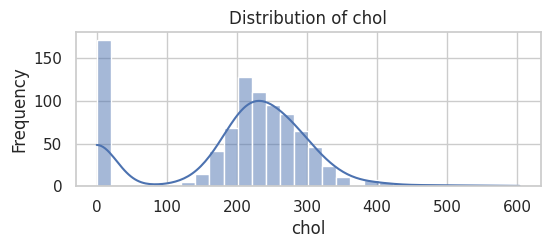

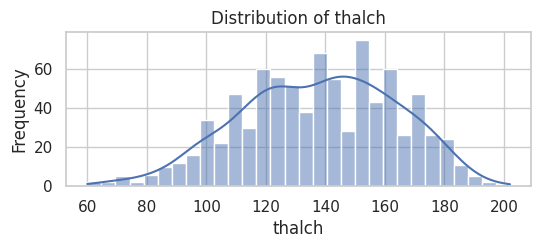

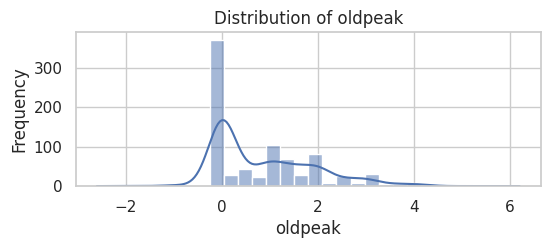

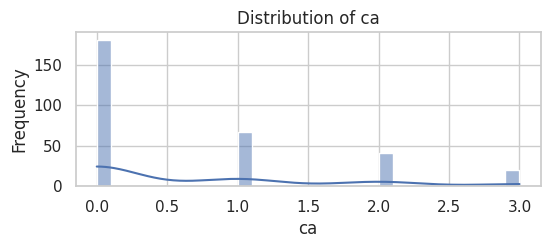

In [ ]:

# Plotting categorical columns
for col in numerical_columns:
    plot_univariate_numerical(df, col)

In [ ]:
# check out the values count of dataset column:

df['dataset'].value_counts()


dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [ ]:

Cleveland_count = 304
Hungart_count = 294
Switzerland_count = 123
VA_Long_beach_count = 200
total_dataset_count = Cleveland_count + Hungart_count + Switzerland_count + VA_Long_beach_count

Cleveland_percentage = (Cleveland_count / total_dataset_count) * 100
Hungart_percentage = (Hungart_count / total_dataset_count) * 100
Switzerland_percentage = (Switzerland_count / total_dataset_count) * 100
VA_Long_beach_percentage = (VA_Long_beach_count / total_dataset_count) * 100

# print the percentage of each category of dataset column:

print(f"Percentage of Cleveland dataset: {Cleveland_percentage:.2f}%")
print(f"Percentage of Hungart dataset: {Hungart_percentage:.2f}%")
print(f"Percentage of Switzerland dataset: {Switzerland_percentage:.2f}%")
print(f"Percentage of VA Long Beach dataset: {VA_Long_beach_percentage:.2f}%")

Percentage of Cleveland dataset: 33.01%
Percentage of Hungart dataset: 31.92%
Percentage of Switzerland dataset: 13.36%
Percentage of VA Long Beach dataset: 21.72%


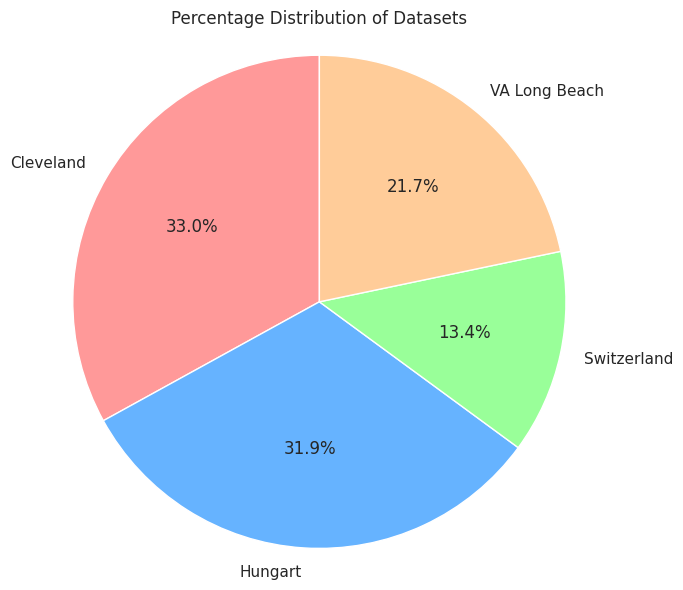

In [ ]:
# Labels and sizes for pie chart
labels = ['Cleveland', 'Hungart', 'Switzerland', 'VA Long Beach']
sizes = [Cleveland_percentage, Hungart_percentage, Switzerland_percentage, VA_Long_beach_percentage]

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.title('Percentage Distribution of Datasets')
plt.show()

## HANDING MISSING VALUES AND OUTLIERS


Outliers removed for chol: 213 outliers removed


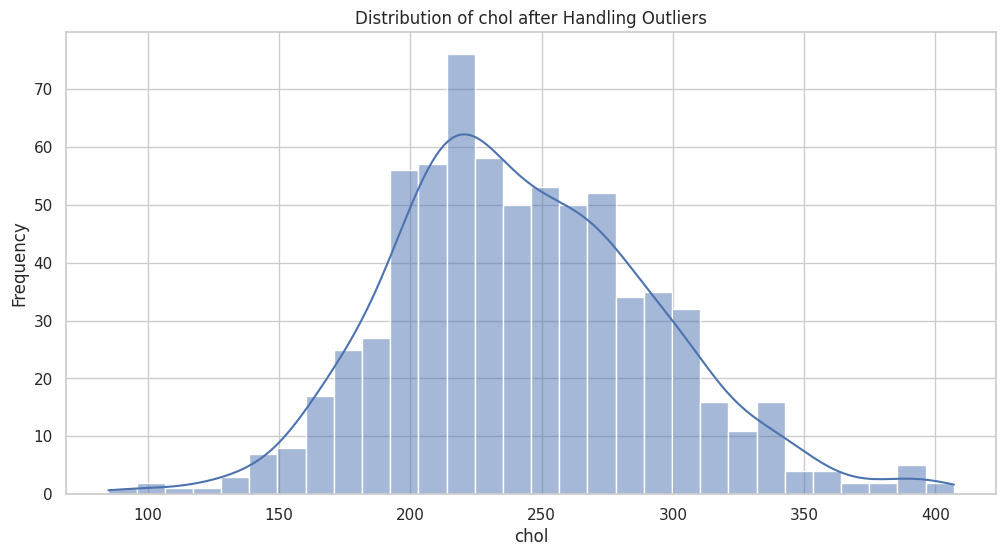

In [ ]:
# Handle Outliers using IQR method for chol column as they are clrealy viible from the univariate analysis

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Print information
    print(f"Outliers removed for {column}: {len(df) - len(filtered_df)} outliers removed")

    return filtered_df

# Handle outliers for the 'chol' column
df = handle_outliers_iqr(df, 'chol')

# Plotting the distribution after handling outliers
plt.figure(figsize=(12, 6))
sns.histplot(df['chol'], kde=True, bins=30)
plt.title('Distribution of chol after Handling Outliers')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Handling missing values for chol
#distribution of cholesterol is slightly skewed median imputation might be more appropriate than mean, as it is less sensitive to extreme values.

median_chol = df['chol'].median()
df.fillna({'chol': median_chol}, inplace=True)



In [ ]:
#Similarly for trestbps , thalch

df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
df['thalch'].fillna(df['thalch'].median(), inplace=True)

/tmp/ipykernel_10588/920063151.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
/tmp/ipykernel_10588/920063151.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# Fill missing values with the most frequent value (False) for fbs
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)

/tmp/ipykernel_10588/3429178284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
/tmp/ipykernel_10588/3429178284.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)


In [ ]:
#similary for exang and restecg
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)

/tmp/ipykernel_10588/3459737505.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exang'].fillna(df['exang'].mode()[0], inplace=True)
/tmp/ipykernel_10588/3459737505.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'].fillna(df['exang'].mode()[0], inplace=True)
/tmp/ipykernel_10588/3459737505.

/tmp/ipykernel_10588/1560350912.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


(692, 16)


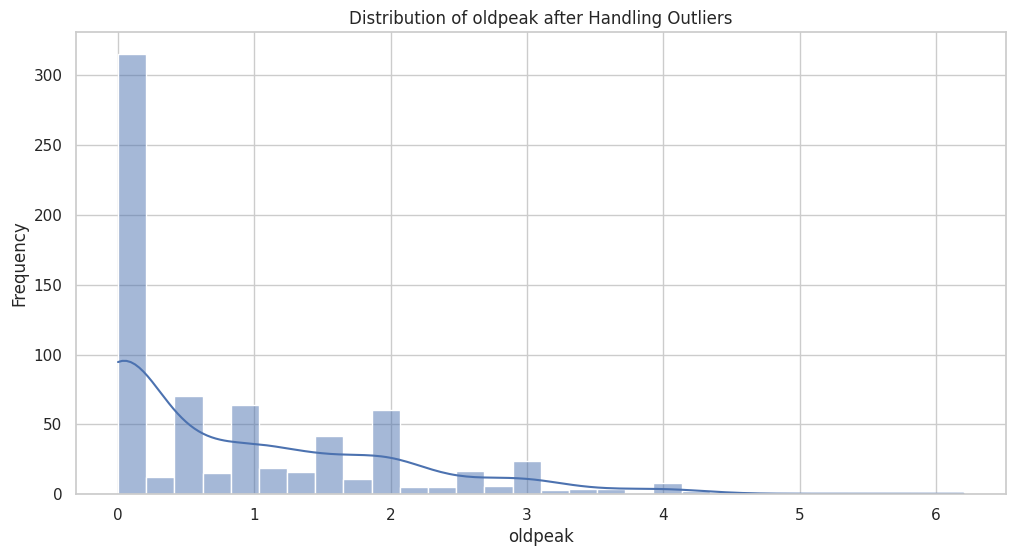

In [ ]:
#removing outliers for oldpeak
# Median Imputation
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)
#Removing outliers
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]

# Output the shape of the DataFrame after filtering
print(df_filtered.shape)
plt.figure(figsize=(12, 6))
sns.histplot(df['oldpeak'], kde=True, bins=30)
plt.title('Distribution of oldpeak after Handling Outliers')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalch        0
exang         0
oldpeak       0
slope       246
ca          408
thal        360
num           0
dtype: int64

In [ ]:
# Set a threshold of 30% missing values
threshold = 0.3

# Calculate the proportion of missing values in each column
missing_proportion = df.isnull().mean()

# Drop columns where the proportion of missing values is greater than the threshold
df_cleaned = df.loc[:, missing_proportion < threshold]

# Display the new shape of the DataFrame and the cleaned DataFrame
print(df_cleaned.shape)
print(df_cleaned.isnull().sum())

(707, 13)
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


## MULTIVARIATE ANALYSIS

### BIVARIATE ANALYSIS

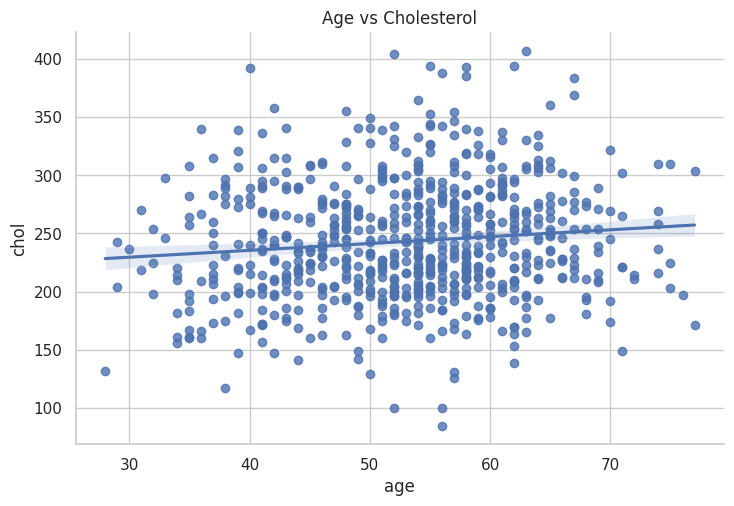

In [ ]:
# Investigating how age relates to cholesterol levels.
sns.lmplot(x='age', y='chol', data=df, aspect=1.5)
plt.title('Age vs Cholesterol')
plt.show()

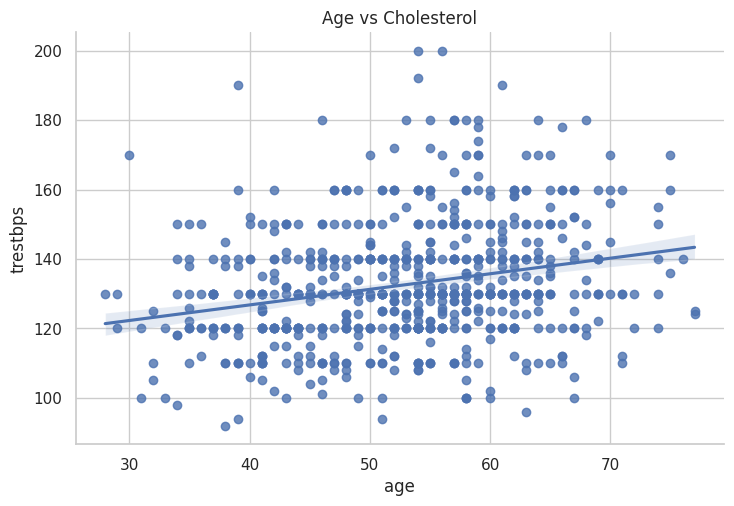

In [ ]:
# To check if blood pressure increases with age.
sns.lmplot(x='age', y='trestbps', data=df, aspect=1.5)
plt.title('Age vs Cholesterol')
plt.show()

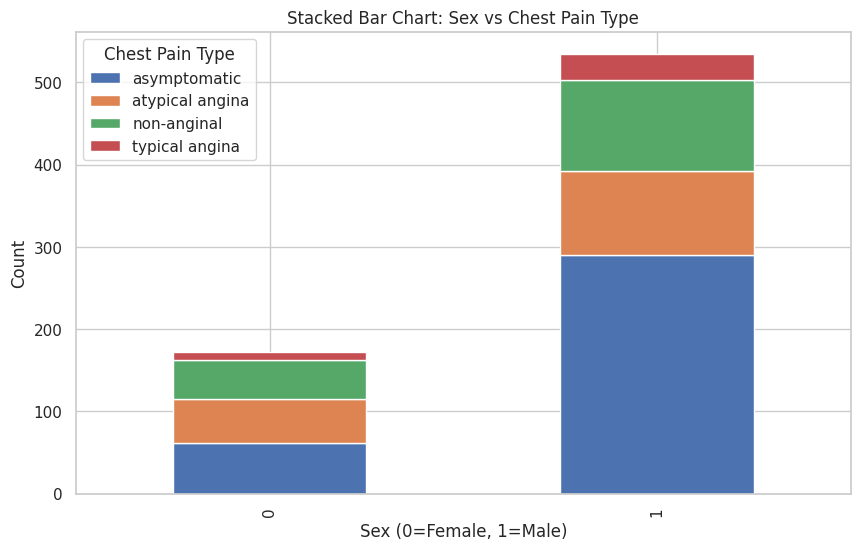

In [ ]:

df['sex_numeric'] = df['sex'].map({'Male': 1, 'Female': 0})

# Group the data by 'sex' and 'cp' (chest pain)
stacked_data = pd.crosstab(df['sex_numeric'], df['cp'])

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Chart: Sex vs Chest Pain Type')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type')
plt.show()


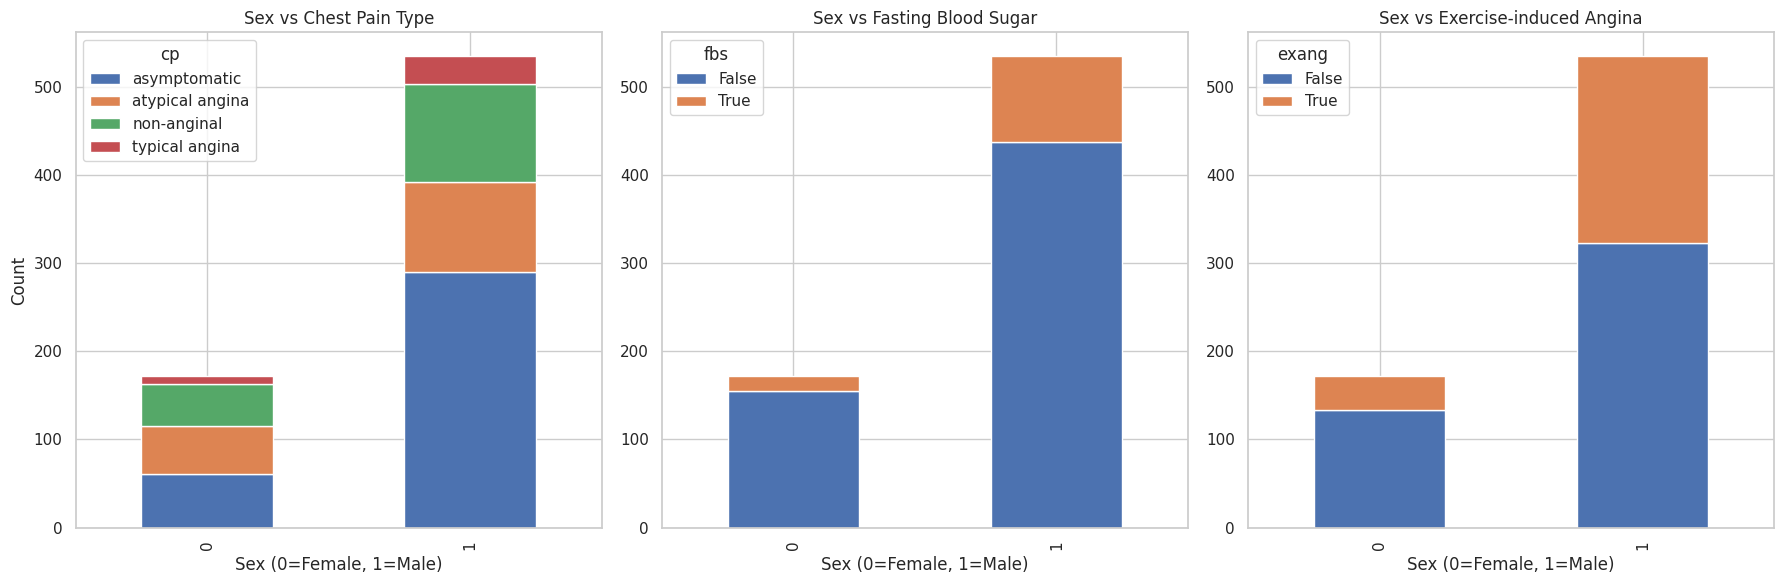

In [ ]:
#Drawing stacked column charts to see sex versus different sympotumn/difeerent heart disease
stacked_data_cp = pd.crosstab(df['sex_numeric'], df['cp'])
stacked_data_fbs = pd.crosstab(df['sex_numeric'], df['fbs'])
stacked_data_exang = pd.crosstab(df['sex_numeric'], df['exang'])

# Plot stacked bar charts for each
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Stacked bar for cp (chest pain)
stacked_data_cp.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Sex vs Chest Pain Type')
ax[0].set_xlabel('Sex (0=Female, 1=Male)')
ax[0].set_ylabel('Count')

# Stacked bar for fbs (fasting blood sugar)
stacked_data_fbs.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Sex vs Fasting Blood Sugar')
ax[1].set_xlabel('Sex (0=Female, 1=Male)')

# Stacked bar for exang (exercise-induced angina)
stacked_data_exang.plot(kind='bar', stacked=True, ax=ax[2])
ax[2].set_title('Sex vs Exercise-induced Angina')
ax[2].set_xlabel('Sex (0=Female, 1=Male)')

plt.tight_layout()
plt.show()

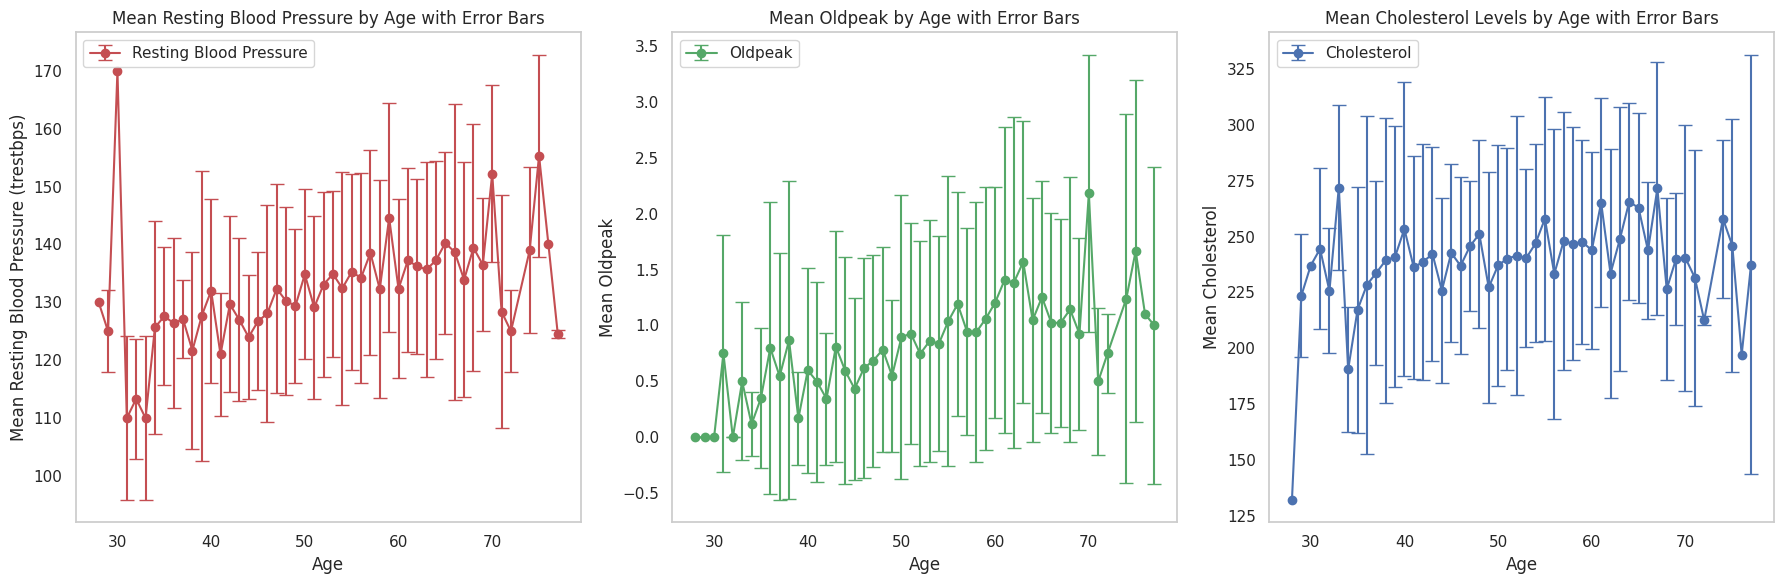

In [ ]:

# Calculate mean and standard deviation for each numeric variable by age
trestbps_stats = df.groupby('age')['trestbps'].agg(['mean', 'std']).reset_index()
oldpeak_stats = df.groupby('age')['oldpeak'].agg(['mean', 'std']).reset_index()
chol_stats = df.groupby('age')['chol'].agg(['mean', 'std']).reset_index()

# Create a combined figure with subplots
plt.figure(figsize=(18, 6))

# Line chart for trestbps
plt.subplot(1, 3, 1)
plt.errorbar(trestbps_stats['age'], trestbps_stats['mean'], yerr=trestbps_stats['std'],
             fmt='-o', capsize=5, color='r', label='Resting Blood Pressure')
plt.title('Mean Resting Blood Pressure by Age with Error Bars')
plt.xlabel('Age')
plt.ylabel('Mean Resting Blood Pressure (trestbps)')
plt.legend()
plt.grid()

# Line chart for oldpeak
plt.subplot(1, 3, 2)
plt.errorbar(oldpeak_stats['age'], oldpeak_stats['mean'], yerr=oldpeak_stats['std'],
             fmt='-o', capsize=5, color='g', label='Oldpeak')
plt.title('Mean Oldpeak by Age with Error Bars')
plt.xlabel('Age')
plt.ylabel('Mean Oldpeak')
plt.legend()
plt.grid()

# Line chart for cholesterol
plt.subplot(1, 3, 3)
plt.errorbar(chol_stats['age'], chol_stats['mean'], yerr=chol_stats['std'],
             fmt='-o', capsize=5, color='b', label='Cholesterol')
plt.title('Mean Cholesterol Levels by Age with Error Bars')
plt.xlabel('Age')
plt.ylabel('Mean Cholesterol')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Create a contingency table for sex and fbs
contingency_table = pd.crosstab(df['sex'], df['fbs'])

# Perform Chi-square test
chi2_result = stats.chi2_contingency(contingency_table)

print(f'Chi-Square results: Chi2-statistic = {chi2_result.statistic}, p-value = {chi2_result.pvalue}')

Chi-Square results: Chi2-statistic = 6.192427891568236, p-value = 0.012829805135653186


In [ ]:
contingency_table = pd.crosstab(df['cp'], df['exang'])

# Perform Chi-square test
chi2_result = stats.chi2_contingency(contingency_table)

print(f'Chi-Square results: Chi2-statistic = {chi2_result.statistic}, p-value = {chi2_result.pvalue}')


Chi-Square results: Chi2-statistic = 161.24757498969845, p-value = 9.860282548355354e-35


In [ ]:
# Perform ANOVA between 'chol' based on 'sex'
anova_result = stats.f_oneway(
    df[df['sex'] == 0]['chol'].dropna(),
    df[df['sex'] == 1]['chol'].dropna()
)

print(f'ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')


ANOVA results: F-statistic = nan, p-value = nan


/tmp/ipykernel_10588/3010475795.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(


In [ ]:
#zscores for trestbps vs sex as n>30

male_trestbps = df[df['sex'] == 0]['trestbps'].dropna()
female_trestbps = df[df['sex'] == 1]['trestbps'].dropna()

# Calculate means and standard deviations
mean_male = male_trestbps.mean()
mean_female = female_trestbps.mean()
std_male = male_trestbps.std()
std_female = female_trestbps.std()
n_male = len(male_trestbps)
n_female = len(female_trestbps)

# Z-Test calculation
if n_male == 0 or n_female == 0:
    print("Error: The number of male or female samples is zero.")
elif std_male == 0 or std_female == 0:
    print("Error: The standard deviation of male or female samples is zero.")
else:
    z_score = (mean_male - mean_female) / (std_male / (n_male ** 0.5) + std_female / (n_female ** 0.5))
    print(f'Z-Test results: Z-score = {z_score}')

Error: The number of male or female samples is zero.


### MULTIVARIATE ANALYSIS

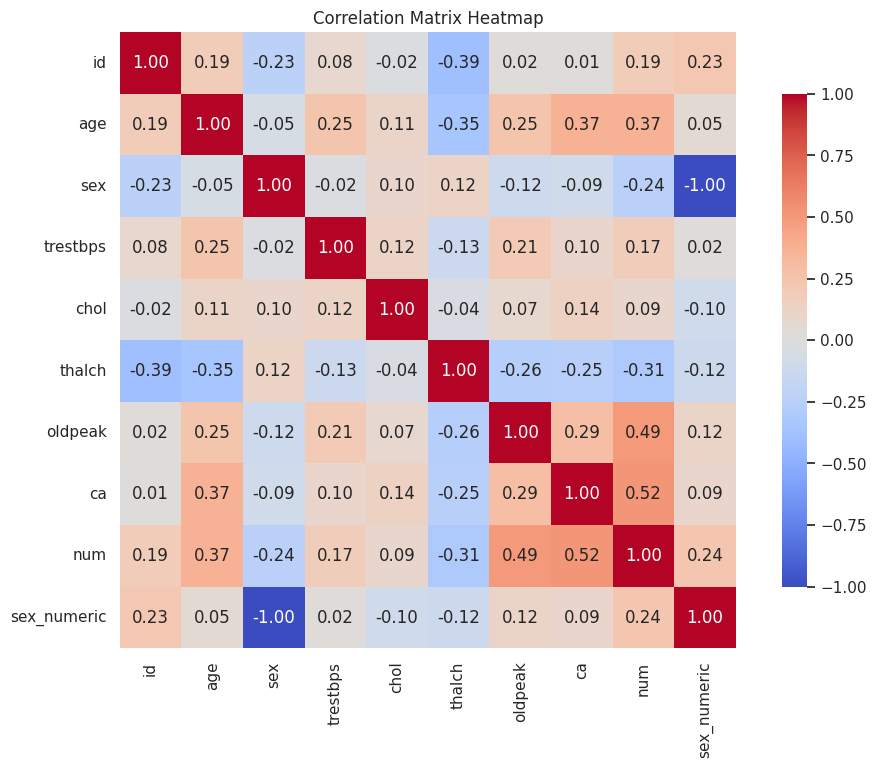

In [ ]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()


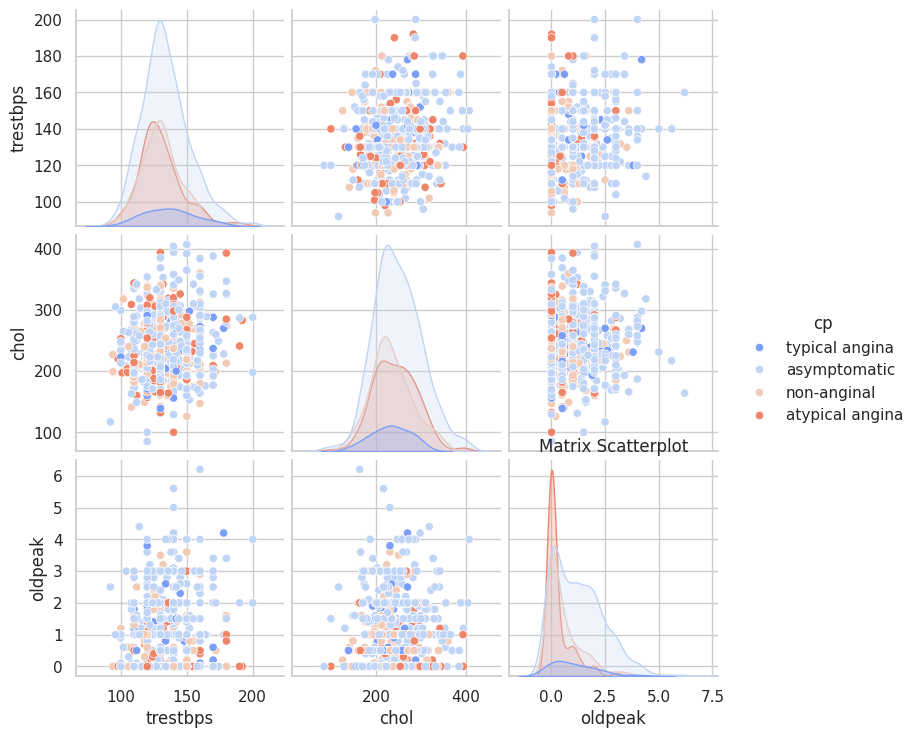

In [ ]:
# Select the relevant columns for the scatterplot
columns_of_interest = ['trestbps', 'cp', 'chol', 'oldpeak']

# Create a pair plot
sns.pairplot(df[columns_of_interest], hue='cp', palette='coolwarm', diag_kind='kde')

plt.title('Matrix Scatterplot')
plt.show()

In [ ]:
# Calculate overall mean
overall_mean = df['trestbps'].mean()

# Calculate group means
group_means = df.groupby('cp')['trestbps'].mean()

# Calculate Between-groups Variance
between_groups_variance = sum(df['trestbps'].count() * (group_means - overall_mean) ** 2)

# Calculate Within-groups Variance
within_groups_variance = sum((df.groupby('cp')['trestbps'].apply(lambda x: ((x - x.mean()) ** 2).sum())))

print(f'Between-groups Variance: {between_groups_variance}')
print(f'Within-groups Variance: {within_groups_variance}')

Between-groups Variance: 18585.346346998766
Within-groups Variance: 208202.8915477834


id               0
age              0
sex              0
dataset          0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalch           0
exang            0
oldpeak          0
slope          246
ca             408
thal           360
num              0
sex_numeric      0
dtype: int64


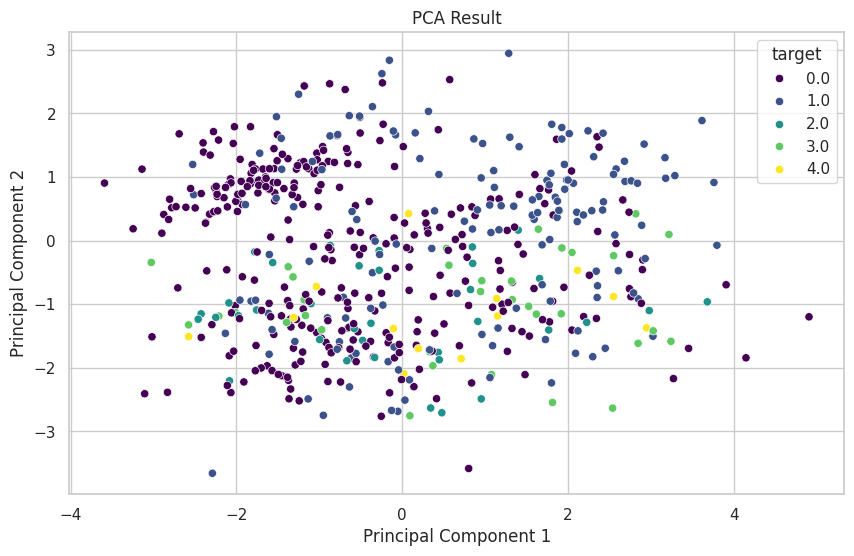

In [ ]:

print(df.isnull().sum())

# Handle missing values for numerical columns only
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Prepare the features and target
X = df.drop(columns=['id', 'num', 'dataset', 'sex', 'sex_numeric'])
y = df['num']

# Encode categorical features
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Plotting PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='viridis')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'sex_numeric'],
      dtype='object')

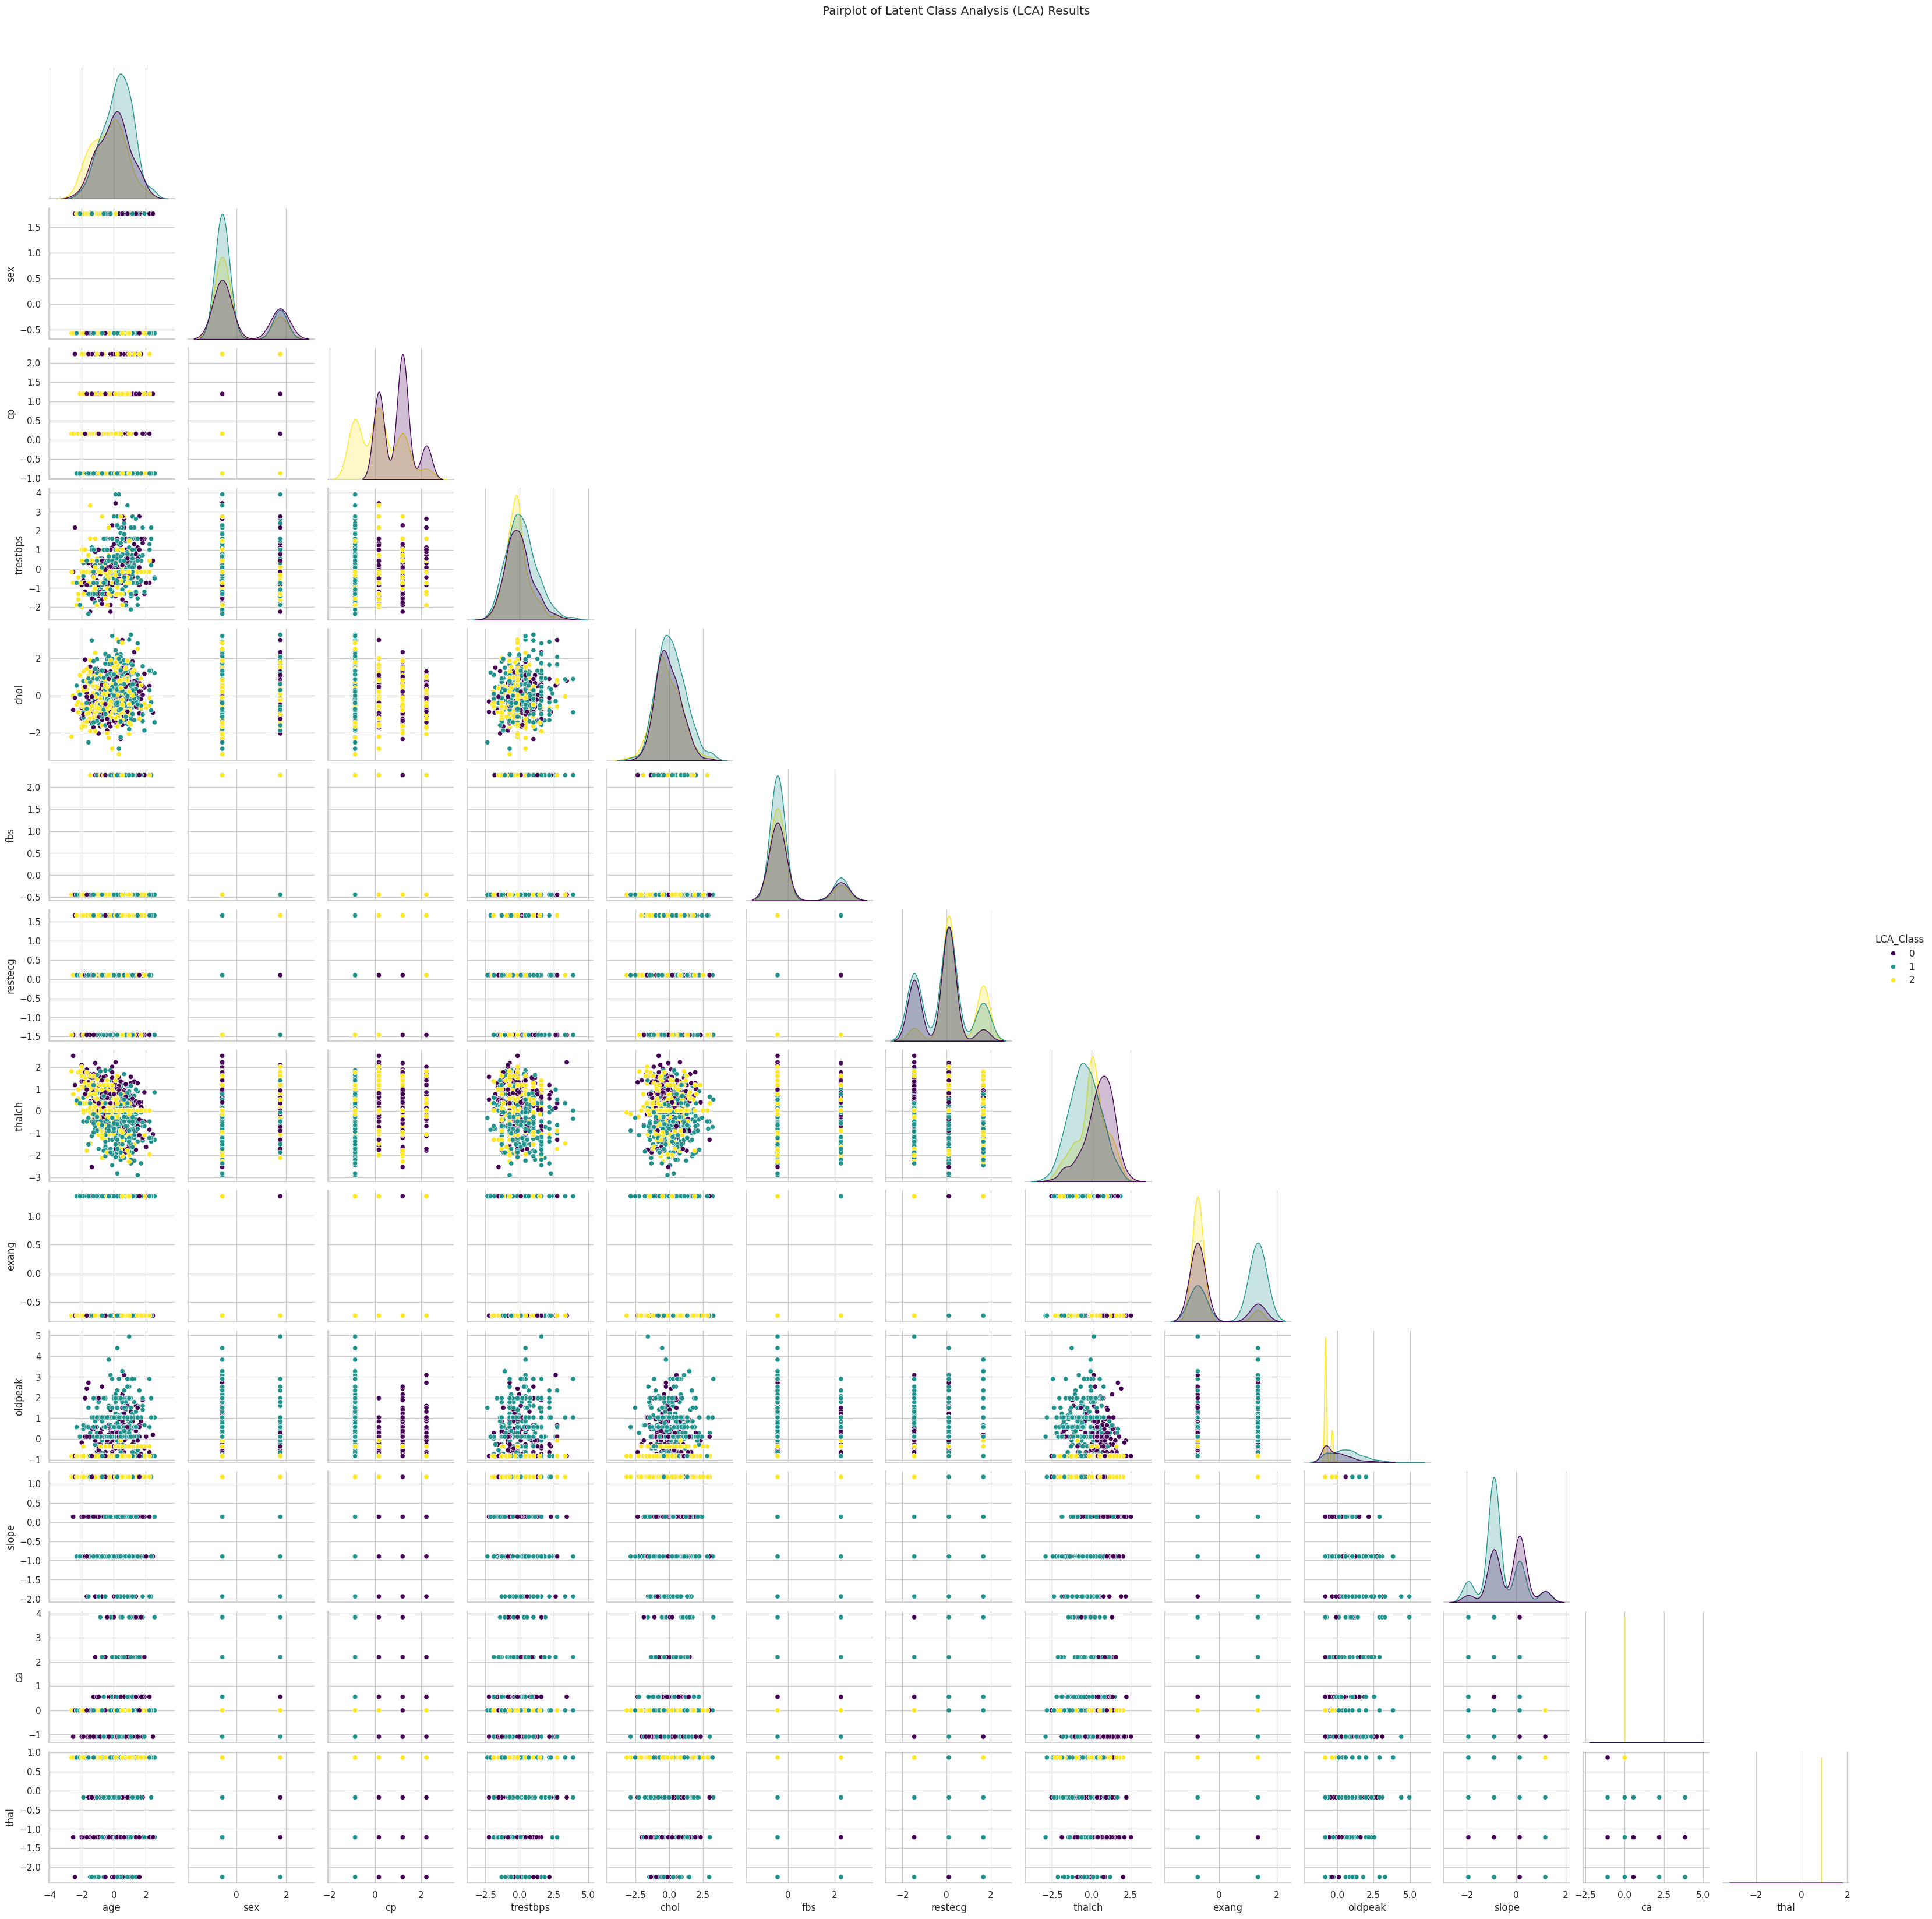

LCA_Class
1    283
2    213
0    211
Name: count, dtype: int64


In [ ]:
# Assuming 'df' is your DataFrame and it's already loaded
X = df.drop(columns=['id', 'num', 'dataset', 'sex_numeric'])
y = df['num']

# Encode categorical features
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Latent Class Analysis using Gaussian Mixture Model
n_classes = 3
gmm = GaussianMixture(n_components=n_classes, random_state=42)
gmm.fit(X_scaled)

# Get the predicted class for each sample
labels = gmm.predict(X_scaled)
df['LCA_Class'] = labels

# Create a DataFrame with LCA results
lca_df = pd.DataFrame(data=X_scaled, columns=X.columns)
lca_df['LCA_Class'] = labels

# Pairplot for visualizing relationships between features with LCA classes
sns.pairplot(lca_df, hue='LCA_Class', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Latent Class Analysis (LCA) Results', y=1.02)
plt.show()

# Display the distribution of classes
print(df['LCA_Class'].value_counts())